# load datasets

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [35]:
# iris dataset 불러오기
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data = iris_dataset.data, columns=iris_dataset.feature_names) # 설명변수 (x)
df_iris_target = pd.DataFrame(data = iris_dataset.target, columns=['class']) # 목표변수 (y)

In [36]:
df_iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
df_iris_target.head()

,class
0,0
1,0
2,0
3,0
4,0


In [38]:
df_iris_features.shape, df_iris_target.shape

((150, 4), (150, 1))

# creating a training and validation set

In [39]:
# Scikit-Learn의 train_test_split 함수를 사용해서 train, test 데이터를 분리
from sklearn.model_selection import train_test_split

# iris dataset 나누기
iris_split = train_test_split(df_iris_features, df_iris_target, test_size=0.25, random_state=17)

df_iris_features_train = iris_split[0] # train 설명변수
df_iris_features_test = iris_split[1] # test 설명변수
df_iris_target_train = iris_split[2] # train 목표변수
df_iris_target_test = iris_split[3] # test 목표변수

In [40]:
df_iris_features_train.shape, df_iris_target_train.shape

((112, 4), (112, 1))

In [41]:
df_iris_features_test.shape, df_iris_target_test.shape

((38, 4), (38, 1))

- train_test_split 함수는 기본적으로 데이터를 섞은 후 훈련 데이터가 끝나고 테스트 데이터가 시작되는 점을 경계로 데이터셋을 나눔
- 만약 원본 데이터가 여러 개의 범주를 갖고 있고 범주들의 데이터 양이 불균형하다면, 나눈 데이터도 비슷한 비율을 갖도록 해야 함
- train_test_split 함수에서 stratify 파라미터는 데이터가 여러 범주를 갖고 있는 경우 나누기 전과 후의 비율이 동일하도록 유지해줌

In [42]:
# iris dataset, with stratified sampling
iris_split_strat = train_test_split(df_iris_features, df_iris_target, 
                                    test_size=0.25, random_state=17, stratify=df_iris_target)
df_iris_features_train2 = iris_split_strat[0]
df_iris_features_test2 = iris_split_strat[1]
df_iris_target_train2 = iris_split_strat[2]
df_iris_target_test2 = iris_split_strat[3]

In [43]:
df_iris_features_train2.shape, df_iris_target_train2.shape

((112, 4), (112, 1))

In [44]:
df_iris_features_test2.shape, df_iris_target_test2.shape

((38, 4), (38, 1))

In [45]:
df_iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
df_iris_features_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
34,4.9,3.1,1.5,0.2
95,5.7,3.0,4.2,1.2
75,6.6,3.0,4.4,1.4
48,5.3,3.7,1.5,0.2


<AxesSubplot:title={'center':'df_iris_target_train2'}>

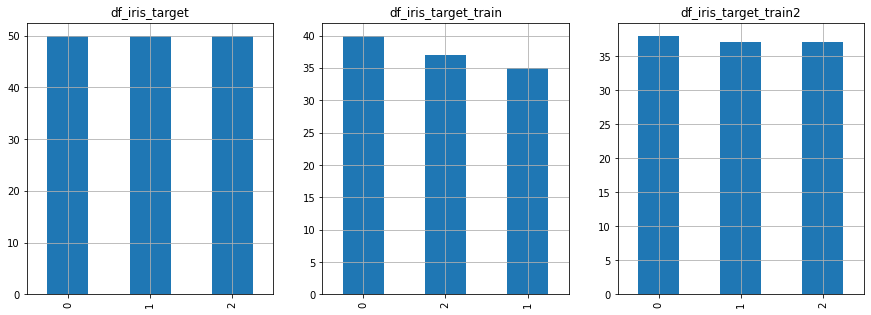

In [47]:
# 판다스 함수를 이용해 원본 데이터셋, 분할 미적용 훈련 데이터셋의 분포를 시각화, 계층화 분할 적용 훈련 데이터셋(stratify)
# stratify를 적용한 데이터셋의 분포가 원본 데이터셋과 비슷한 분포를 가짐
# class 속성을 대표로

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# 원본 데이터셋
axes[0].set_title('df_iris_target')
df_iris_target['class'].value_counts(dropna=False).plot.bar(grid=True, ax=axes[0])

# 분할 미적용 훈련 데이터셋의 분포를 시각화
axes[1].set_title('df_iris_target_train')
df_iris_target_train['class'].value_counts(dropna=False).plot.bar(grid=True, ax=axes[1])

# 계층화 분할 적용 훈련 데이터셋(stratify)
axes[2].set_title('df_iris_target_train2')
df_iris_target_train2['class'].value_counts(dropna=False).plot.bar(grid=True, ax=axes[2])

# k-fold cross validation
- 데이터셋을 훈련 데이터와 테스트 데이터로 나눌 때 발생할 수 있는 가장 큰 단점은 훈련 데이터에서 나타나는 특징이 테스트 데이터가 나타나지 않을 수 있다는 점
- 훈련 데이터에서만 잘 작동하는 모델을 생성하지 않기 위해 k-fold cross validation이라는 방법을 사용
- 이 방법은 이후 모델링을 할 때 적용해보도록 하자


## 작동 원리

1. k 값 선택
2. 원본 데이터 섞기
3. 원본 데이터를 동일한 크기를 갖는 k개의 데이터셋으로 나누기
4. 각 k에 관해서
       a. k번째 데이터셋을 테스트 데이터로, 나머지 데이터셋을 훈련 데이터로 사용해 모델 학습
       b. k번째 데이터셋에 테스트한 성능 기록
5. 개별 모델들의 평균 성능을 계산해 전체 성능 계산

![pa](./k.png)

In [50]:
# Iris dataset을 10개의 훈련/테스트 데이터셋으로 나누기

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

fold_number = 1
for train_indices, test_indices in kf.split(df_iris_features):
    
    print("Fold number:", fold_number)
    print("Training indices:", train_indices)
    print("Testing indices::", test_indices)
    
    fold_number = fold_number + 1
    
    df_iris_features_train = df_iris_features.iloc[train_indices]
    df_iris_target_train = df_iris_target.iloc[train_indices]
    
    df_iris_features_test = df_iris_features.iloc[test_indices]
    df_iris_target_test = df_iris_target.iloc[test_indices]


Fold number: 1
Training indices: [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  25  27  28  30  31  33  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  89  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 108 109 110 111 112 113 114 115 116 118 119 120
 122 123 124 125 126 127 128 129 130 131 132 133 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149]
Testing indices:: [  3   9  22  26  29  32  34  83  88  90  91 107 117 121 134]
Fold number: 2
Training indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  52  54  55  56  57
  58  59  60  61  62  63  64  66  67  68  69  70  71  72  73  74  75  76
  77  78  80 

In [ ]:
print('Done')